# Getting started with dynamic circuits

We will be using [Qiskit](https://qiskit.org/) throughout the tutorial.
This notebook will guide you through getting set up.

## Usage guide

The tutorial notebooks live in [IBM Quantum Lab](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/dynamic-circuits/). You will need to have an IBM Quantum account to use the Quantum Lab. If you do not already have one, [sign up for an IBM Quantum account](https://quantum-computing.ibm.com/).

You can run these tutorials either in the cloud, or download them to run on your local machine.

### Option 1 - Local Machine

Log on to IBM Quantum Lab with your IBM Quantum account credentials.

Download the [Dynamic circuits notebooks](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/dynamic-circuits/), including the ``figs/`` directory.

Next, install Qiskit by following these [instructions](https://qiskit.org/documentation/install.html).

- Setup a Python virtual environment for the tutorial (good practice but not necessary).
- Make sure you have have the latest Qiskit installed. _(`qiskit-terra>=0.22` and `qiskit-ibm-provider>=0.1.0`)_
    - `pip install jupyter matplotlib scipy`
    - `pip install qiskit --upgrade`
    - To update qiskit-terra, run `pip install qiskit-terra -U`
    - `pip install qiskit-ibm-provider`
- Open up this notebook `"Getting-started-with-Dynamic-Circuits.ipynb"`, run to check your installation, and run your first OpenQASM 3 program on hardware.

### Option 2 - Quantum Lab

Open the tutorial in [Quantum Lab](https://quantum-computing.ibm.com/lab/files/qiskit-tutorials/dynamic-circuits/).

Please make sure to verify that your `qiskit-terra` version `>=0.22.0` and that you are using the latest `qiskit-ibm-provider` version.

In [ ]:
import qiskit.tools.jupyter

%qiskit_version_table

In [2]:
# Running checks for the correct dependencies
import qiskit
from packaging import version

if not (
    version.parse(qiskit.__qiskit_version__["qiskit-terra"]) >= version.parse("0.22")
):
    print(
        "Incorrect dependencies. Found qiskit-terra: "
        + qiskit.__qiskit_version__["qiskit-terra"]
        + "\nNeed qiskit-terra >= 0.22"
    )

try:
    import qiskit_ibm_provider
except ModuleNotFoundError:
    print(
        "You must install the qiskit_ibm_provider with 'pip install qiskit_ibm_provider'"
    )
    raise

In [3]:
# Ignoring warnings
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

The notebook is ready to run!

## Testing OpenQASM 3 support

Let's test out our installation by verifying we have access to the code and hardware necessary.

First, load our backend.

To view the simulators and systems supporting dynamic circuits that you can access, [click here (requires the user to be logged in to IBM Quantum)](https://quantum-computing.ibm.com/services/resources?tab=yours&openqasm3=true).

**Note**: This can be *any* hub/group/project that has access to the required device and the Qiskit runtime and has OpenQASM 3 support

In [4]:
# Note: This can be any hub/group/project that has access to the required device and the Qiskit runtime.
hub = "<hub>"
group = "<group>"
project = "<project>"
backend_name = "<your backend>"
hgp = f"{hub}/{group}/{project}"

Next, we load our IBM Quantum account credentials.

In [5]:
import qiskit
from qiskit_ibm_provider import IBMProvider

# Save token if necessary
# IBMProvider.save_account(token='MY_API_TOKEN')

# Get our backend
provider = IBMProvider()
backend = provider.get_backend(backend_name, instance=hgp)
print(f"Using backend {backend.name}")

Make sure to use any OpenQASM 3-enabled backend.

In [6]:
qasm3_backends = set(
    backend.name for backend in provider.backends(dynamic_circuits=True)
)

print(f"The following backends support dynamic circuits: {qasm3_backends}")

Now we prepare our circuit.

In [7]:
qubit = 0
shots = 1000

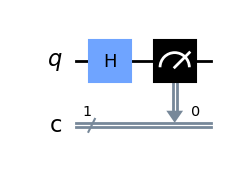

In [8]:
from qiskit import QuantumCircuit

h_qc = QuantumCircuit(1, 1, name="|+> Prep")
h_qc.h(0)
h_qc.measure(0, 0)
h_qc.draw(idle_wires=False, output="mpl")

Next, transpile our quantum circuit for the hardware basis gates.

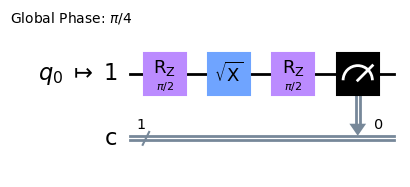

In [9]:
from qiskit import transpile

h_qc_transpiled = transpile(h_qc, backend, initial_layout=[1])
h_qc_transpiled.draw(idle_wires=False, output="mpl")

Now we submit our circuit to the backend to verify it is working.

Note that we have to set `dynamic=True` to communicate to the backend that we want to run a dynamic circuit.

In [10]:
job = backend.run(h_qc_transpiled, shots=shots, dynamic=True)
print(f"Your job's id: {job.job_id()}")
result = job.result()
print(f"|+> preparation results: {result.get_counts(0)}")

Your job's id: cgdmdsjsvrampimk4bb0
|+> preparation results: {'0': 487, '1': 513}


In [11]:
job.error_message()

---

In [ ]:
import qiskit.tools.jupyter

%qiskit_version_table